**Supermarket Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('http://storm.cis.fordham.edu/~bwhite/supermarket_sales.csv') #import the data
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# **Preprocessing**

In [ ]:
df.info() #17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df['Branch'].describe() #three branches: A, B, C

count     1000
unique       3
top          A
freq       340
Name: Branch, dtype: object

In [ ]:
df['Invoice ID'].describe() #every transaction has a unique ID

count            1000
unique           1000
top       445-30-9252
freq                1
Name: Invoice ID, dtype: object

In [ ]:
df['City'].describe() #three branches correspond to the three cities
# A = Yangon, B = Mandalay, C = Naypyitaw

count       1000
unique         3
top       Yangon
freq         340
Name: City, dtype: object

In [ ]:
df['Customer type'].describe() #member or non-member

count       1000
unique         2
top       Member
freq         501
Name: Customer type, dtype: object

In [ ]:
df['Gender'].describe() #male or female

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

In [ ]:
df['Product line'].describe() # 6 categories

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [ ]:
df['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

Convert date and time to datetime object

In [ ]:
import datetime
df['Date Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time']) #combine the date and time column to one datetime object column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2020-12-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00



**Feature** **Selection**

Make a copy of the dataframe. Then drop some of the columns that are repeated or unnecessary.

In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2020-12-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


'Total' column is redundant because it is the same as COGS plus the tax, so we drop Total and Tax column and use cogs (cost of goods sold) when referring the the money spent on a transaction. The gross income is the gross revenue and is redunant because it corresponds exactly with COGS

The gross margin percentage is the same for every transaction, so it is not important.

City corresponds with Branch, so drop it.

In [ ]:
df2.drop(['Tax 5%', 'Total','gross margin percentage', 'City', 'gross income'], inplace=True, axis=1)
df2.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00


**Feature Standardization/Normalization**

Looking for missing values: All columns have 1000 non-null objects, so there are no missing values.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Date           1000 non-null   datetime64[ns]
 8   Time           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  cogs           1000 non-null   float64       
 11  Rating         1000 non-null   float64       
 12  Date Time      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(6)
memory usage: 101.7+ KB


Handling Outliers:


*   Price
*   Quantity
*   cogs



In [ ]:
# handling Outliers
df2.describe()

,Unit price,Quantity,cogs,Rating
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,307.58738,6.97270
std,26.494628,2.923431,234.17651,1.71858
min,10.080000,1.000000,10.17000,4.00000
25%,32.875000,3.000000,118.49750,5.50000
50%,55.230000,5.000000,241.76000,7.00000
75%,77.935000,8.000000,448.90500,8.50000
max,99.960000,10.000000,993.00000,10.00000


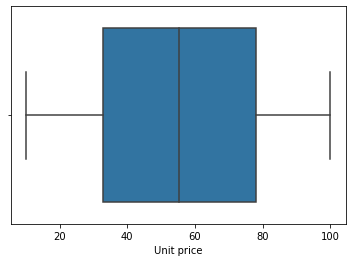

In [ ]:
# outliers - boxplot 
import seaborn as sns
sns.boxplot(x=df2['Unit price']) # no outliers for Unit Price 

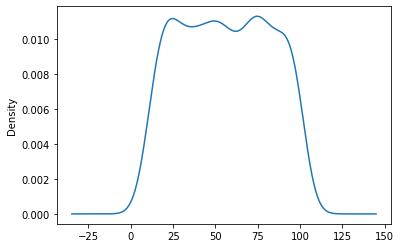

In [ ]:
df2['Unit price'].plot.density()

Binning Unit Price by Equal-Width Partitioning because the prices seem to be equally distributed.

Try creating 9 bins so they are about 10 units per bin

In [ ]:
df2['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

In [ ]:
df2['Price_bin_ew'] = pd.cut(df2['Unit price'], 3)

In [ ]:
df2['Price_bin_ew'].describe()

count              1000
unique                3
top       (70.0, 99.96]
freq                352
Name: Price_bin_ew, dtype: object

Count the frequency to find if the bins are evenly distributed.

In [ ]:
df2.groupby('Price_bin_ew')['Unit price'].count()

Price_bin_ew
(9.99, 40.04]    332
(40.04, 70.0]    316
(70.0, 99.96]    352
Name: Unit price, dtype: int64

Smoothing by bin means:
1. Find the mean of each bin
2. Make new column to put the new value 

In [ ]:
#smooth by bin mean
df2.groupby('Price_bin_ew')['Unit price'].mean()

Price_bin_ew
(9.99, 40.04]    25.011837
(40.04, 70.0]    54.737911
(70.0, 99.96]    85.429034
Name: Unit price, dtype: float64

In [ ]:
def replace_with_bin_mean(x):
  if True:
    x = x.mean()
  return x

In [ ]:
df2.groupby('Price_bin_ew')['Unit price'].apply(replace_with_bin_mean)

Price_bin_ew
(9.99, 40.04]    25.011837
(40.04, 70.0]    54.737911
(70.0, 99.96]    85.429034
Name: Unit price, dtype: float64

In [ ]:
df2['smooth_price_bin_mean'] = df2.groupby('Price_bin_ew')['Unit price'].transform(replace_with_bin_mean)

In [ ]:
bin_results = (df2.groupby('Price_bin_ew')['Unit price'].agg(['max','min']))
bin_results

,max,min
Price_bin_ew,,
"(9.99, 40.04]",39.91,10.08
"(40.04, 70.0]",69.96,40.05
"(70.0, 99.96]",99.96,70.01


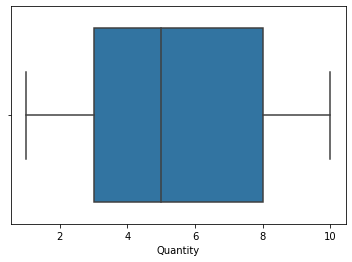

In [ ]:
#no outliers for quantity
sns.boxplot(x=df2['Quantity'])

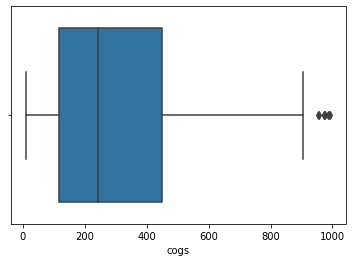

In [ ]:
# cogs - boxplot shows outliers
sns.boxplot(x=df2['cogs'])

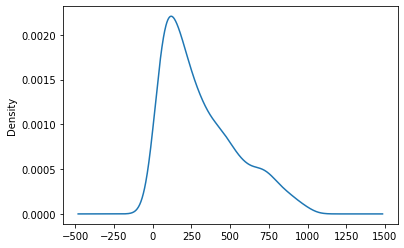

In [ ]:
df2['cogs'].plot.density() #the right side is a lot longer

In [ ]:
#define this function that can be used to find outliers for other columns as well
def findBoundsdf(x):
  q25= x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  lowerB = q25 - IQR*1.5
  upperB = q75 + IQR*1.5
  return lowerB, upperB

In [ ]:
#use function to create masks for upper/lower bounds
l, u = findBoundsdf(df2['cogs'])

mask_u = df2[df2['cogs']>u]
mask_l = df2[df2['cogs']<l]

mask_u #these are the outliers above the Quartile 3

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,Price_bin_ew,smooth_price_bin_mean
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,2019-01-16,2020-12-18 13:32:00,Cash,955.8,4.8,2019-01-16 13:32:00,"(70.0, 99.96]",85.429034
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,2019-02-08,2020-12-18 16:20:00,Credit card,989.8,8.7,2019-02-08 16:20:00,"(70.0, 99.96]",85.429034
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,2019-02-15,2020-12-18 14:53:00,Credit card,993.0,6.6,2019-02-15 14:53:00,"(70.0, 99.96]",85.429034
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,2019-01-09,2020-12-18 13:45:00,Cash,954.4,5.2,2019-01-09 13:45:00,"(70.0, 99.96]",85.429034
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,2019-02-08,2020-12-18 13:00:00,Credit card,972.1,8.7,2019-02-08 13:00:00,"(70.0, 99.96]",85.429034
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,2019-01-30,2020-12-18 20:23:00,Ewallet,985.2,4.5,2019-01-30 20:23:00,"(70.0, 99.96]",85.429034
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,2019-01-12,2020-12-18 16:18:00,Ewallet,975.0,8.0,2019-01-12 16:18:00,"(70.0, 99.96]",85.429034
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,2019-01-15,2020-12-18 13:48:00,Credit card,973.7,4.9,2019-01-15 13:48:00,"(70.0, 99.96]",85.429034
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,2020-12-18 17:16:00,Ewallet,973.8,4.4,2019-03-02 17:16:00,"(70.0, 99.96]",85.429034


In [ ]:
mask_l #no outliers below Q1

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,Price_bin_ew,smooth_price_bin_mean


In [ ]:
#replace the outlier values with the upper boundary
df2['new_cogs'] = df2['cogs']
for i in mask_u.index:
  df2.loc[i, 'new_cogs']=u

df2[df2['cogs']>u] 
#the rows that were previously the outliers were replaced with the upper boundary to Q3

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,Price_bin_ew,smooth_price_bin_mean,new_cogs
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,2019-01-16,2020-12-18 13:32:00,Cash,955.8,4.8,2019-01-16 13:32:00,"(70.0, 99.96]",85.429034,944.51625
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,2019-02-08,2020-12-18 16:20:00,Credit card,989.8,8.7,2019-02-08 16:20:00,"(70.0, 99.96]",85.429034,944.51625
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,2019-02-15,2020-12-18 14:53:00,Credit card,993.0,6.6,2019-02-15 14:53:00,"(70.0, 99.96]",85.429034,944.51625
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,2019-01-09,2020-12-18 13:45:00,Cash,954.4,5.2,2019-01-09 13:45:00,"(70.0, 99.96]",85.429034,944.51625
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,2019-02-08,2020-12-18 13:00:00,Credit card,972.1,8.7,2019-02-08 13:00:00,"(70.0, 99.96]",85.429034,944.51625
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,2019-01-30,2020-12-18 20:23:00,Ewallet,985.2,4.5,2019-01-30 20:23:00,"(70.0, 99.96]",85.429034,944.51625
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,2019-01-12,2020-12-18 16:18:00,Ewallet,975.0,8.0,2019-01-12 16:18:00,"(70.0, 99.96]",85.429034,944.51625
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,2019-01-15,2020-12-18 13:48:00,Credit card,973.7,4.9,2019-01-15 13:48:00,"(70.0, 99.96]",85.429034,944.51625
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,2020-12-18 17:16:00,Ewallet,973.8,4.4,2019-03-02 17:16:00,"(70.0, 99.96]",85.429034,944.51625


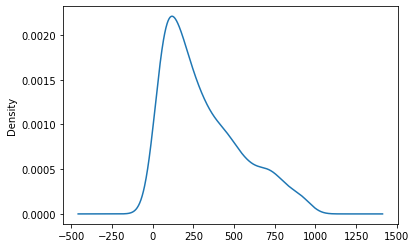

In [ ]:
df2['new_cogs'].plot.density() #after replacing outlier values with upper boundary it looks like the original

In [ ]:
df2 = df2.drop(mask_u.index, axis=0) #so we try dropping these rows altogether

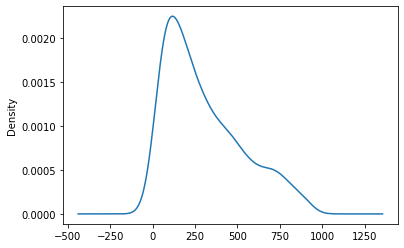

In [ ]:
df2['new_cogs'].plot.density() #after drops it still looks similar but we will keep it

Let's put cogs column into bins to help with the classification later on.

In [ ]:
df2['cogs'].describe()

count    991.000000
mean     301.528335
std      226.390085
min       10.170000
25%      116.350000
50%      240.720000
75%      442.540000
max      906.500000
Name: cogs, dtype: float64

In [ ]:
df2['cogs'].median()

240.72

COGS column is slightly skewed toward lower values. 

In [ ]:
df2['cogs_bin_ew'] = pd.cut(df2['cogs'], 10)
df2.groupby('cogs_bin_ew')['cogs'].count() #see if the values are evenly spread between the bins

cogs_bin_ew
(9.274, 99.803]       223
(99.803, 189.436]     186
(189.436, 279.069]    147
(279.069, 368.702]    108
(368.702, 458.335]     94
(458.335, 547.968]     69
(547.968, 637.601]     50
(637.601, 727.234]     50
(727.234, 816.867]     37
(816.867, 906.5]       27
Name: cogs, dtype: int64

In [ ]:
cogs_ew_bin_results = (df2.groupby('cogs_bin_ew')['cogs'].agg(['max','min']))
cogs_ew_bin_results

,max,min
cogs_bin_ew,,
"(9.274, 99.803]",99.69,10.17
"(99.803, 189.436]",189.18,99.84
"(189.436, 279.069]",277.56,189.52
"(279.069, 368.702]",366.40,279.18
"(368.702, 458.335]",457.17,369.80
"(458.335, 547.968]",547.92,461.45
"(547.968, 637.601]",635.60,548.32
"(637.601, 727.234]",727.11,639.80
"(727.234, 816.867]",815.67,727.80


In [ ]:
df2['cogs_bin_ed'] = pd.qcut(df2['cogs'], 10)
cogs_ed_bin_results = (df2.groupby('cogs_bin_ed')['cogs'].agg(['max','min']))
cogs_ed_bin_results

,max,min
cogs_bin_ed,,
"(10.169, 63.69]",63.69,10.17
"(63.69, 92.04]",92.04,64.99
"(92.04, 139.36]",139.36,92.78
"(139.36, 183.88]",183.88,139.65
"(183.88, 240.72]",240.72,184.25
"(240.72, 305.82]",305.82,240.96
"(305.82, 389.27]",389.27,306.45
"(389.27, 498.9]",498.90,390.96
"(498.9, 668.43]",668.43,499.02


Visualizing the difference between the two binning methods:

*   Equal-Width means there are a lot more transactions in the leftmost bins
*   Equal-Depth means the leftmost bins cover a smaller range of values than the rightmost bins.

Based on this information, we choose to use equal-depth binning. In our data, the COGS is the subtotal (cost before tax) of the transaction. It is more useful to use equal-depth binning for this data because the less expensive transactions are more common. We will have more bins focusing on this data and the discrepancies between bins. 


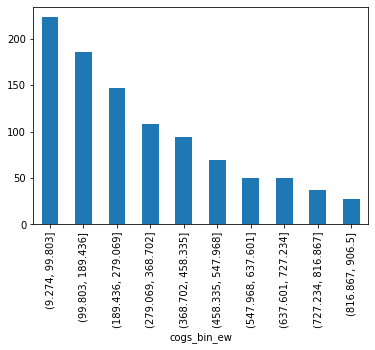

In [ ]:
df2.groupby('cogs_bin_ew')['cogs'].count().plot.bar()

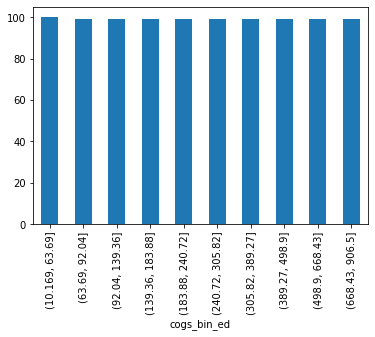

In [ ]:
df2.groupby('cogs_bin_ed')['cogs'].count().plot.bar()

Now, we perform smoothing by bin means as an integer 

In [ ]:
df2['smooth_cogs_bin_mean'] = df2.groupby('cogs_bin_ed')['cogs'].transform(lambda x: int(x.mean()))

In [ ]:
df_cleaned = df2.drop(labels=['new_cogs', 'cogs_bin_ew', 'cogs_bin_ed', 'Price_bin_ew'], axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice ID             991 non-null    object        
 1   Branch                 991 non-null    object        
 2   Customer type          991 non-null    object        
 3   Gender                 991 non-null    object        
 4   Product line           991 non-null    object        
 5   Unit price             991 non-null    float64       
 6   Quantity               991 non-null    int64         
 7   Date                   991 non-null    datetime64[ns]
 8   Time                   991 non-null    datetime64[ns]
 9   Payment                991 non-null    object        
 10  cogs                   991 non-null    float64       
 11  Rating                 991 non-null    float64       
 12  Date Time              991 non-null    datetime64[ns]
 13  smoot

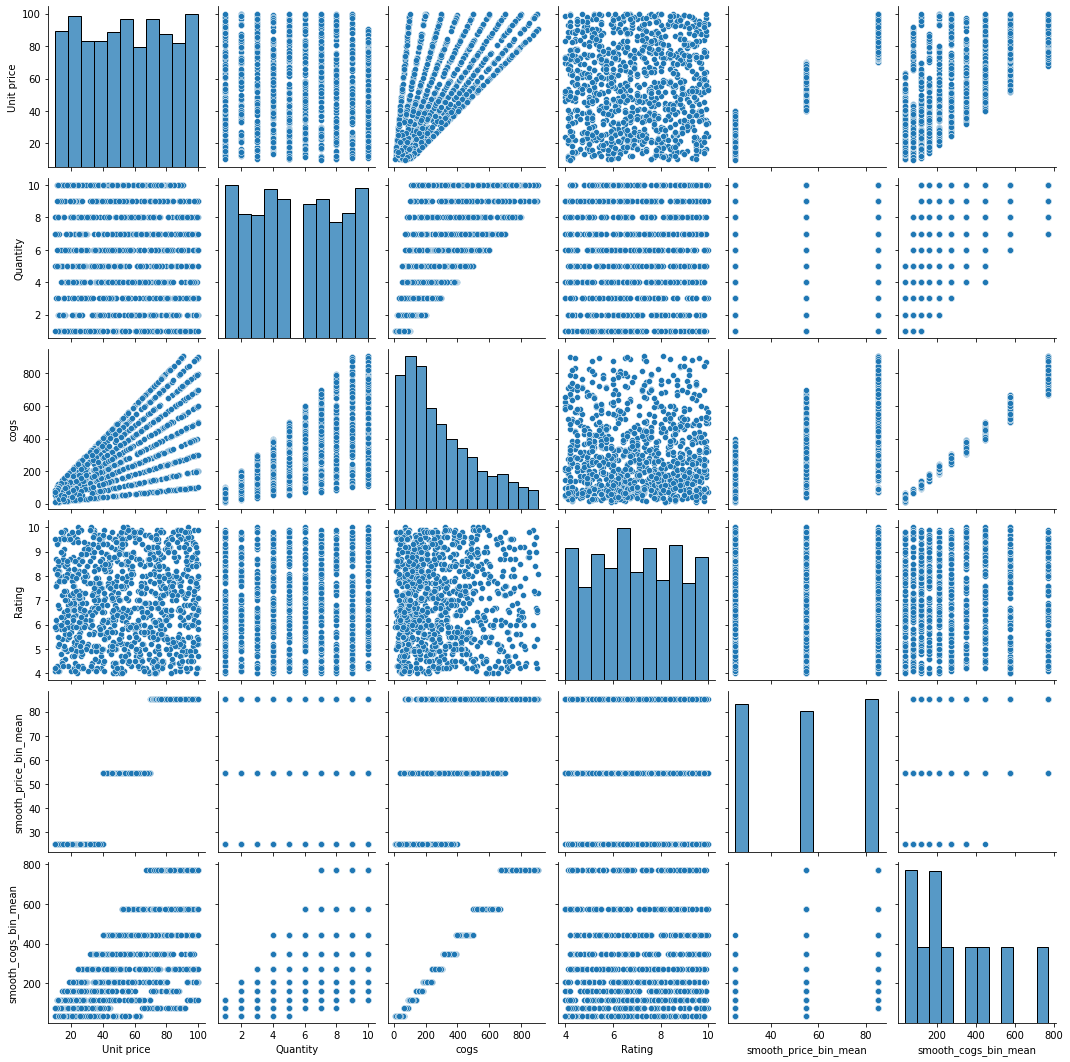

In [ ]:
sns.pairplot(df_cleaned)

In [ ]:
df_cleaned.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,smooth_price_bin_mean,smooth_cogs_bin_mean
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00,85.429034,575.0
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00,25.011837,78.0
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00,54.737911,348.0
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00,54.737911,445.0
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00,85.429034,575.0


Using scikit_learn package to adopt regression which will adjust data.

In [ ]:
import matplotlib.pyplot as plt #for linear regression

In [ ]:
%matplotlib inline

In [ ]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50) #random samples from a uniform distribution over [0, 1)
y = 2* x-1 +rng.randn(50) #2 is coefficient and -1 is intercept

In [ ]:
df_regression = df_cleaned
df_regression = pd.DataFrame(x, columns = ['smooth_price_bin_mean'])
df_regression ['smooth_cogs_bin_mean'] = y
df_regression.head()

,smooth_price_bin_mean,smooth_cogs_bin_mean
0,3.745401,7.229269
1,9.507143,18.185654
2,7.319939,13.524231
3,5.986585,10.672066
4,1.560186,0.641851


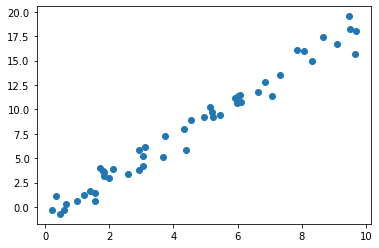

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

In [ ]:
X = df_regression['smooth_price_bin_mean'][:,np.newaxis]
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(50, 1)

In [ ]:
model.fit(X, df_regression['smooth_cogs_bin_mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_ #we used 2 for the coefficient

array([1.9776566])

In [ ]:
model.intercept_ #we used -1 for the intercept

-0.9033107255311146

In [ ]:
yfit = model.predict(X) #predicted by the model
yfit.shape

(50,)

In [ ]:
df_regression['yfit'] = yfit
df_regression.head()

,smooth_price_bin_mean,smooth_cogs_bin_mean,yfit
0,3.745401,7.229269,6.503807
1,9.507143,18.185654,17.898554
2,7.319939,13.524231,13.573016
3,5.986585,10.672066,10.936098
4,1.560186,0.641851,2.182202


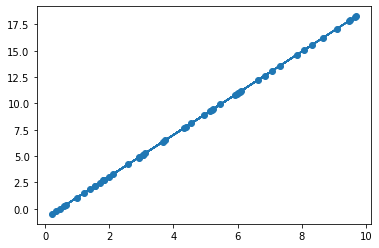

In [ ]:
plt.scatter(df_regression['smooth_price_bin_mean'], df_regression['yfit'])
plt.plot(df_regression['smooth_price_bin_mean'], df_regression['yfit'])

Correlation

In [ ]:
x_train = df_cleaned #using sklearn package to train

df_x_train = pd.DataFrame(x_train)
df_x_train.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,smooth_price_bin_mean,smooth_cogs_bin_mean
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00,85.429034,575.0
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00,25.011837,78.0
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00,54.737911,348.0
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00,54.737911,445.0
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00,85.429034,575.0


In [ ]:
df_x_train.corr(method='pearson') #finding whether each column is positively correlated

,Unit price,Quantity,cogs,Rating,smooth_price_bin_mean,smooth_cogs_bin_mean
Unit price,1.000000,-0.011506,0.623355,-0.002527,0.943041,0.614161
Quantity,-0.011506,1.000000,0.699290,-0.009694,0.005856,0.697712
cogs,0.623355,0.699290,1.000000,-0.026092,0.602227,0.989934
Rating,-0.002527,-0.009694,-0.026092,1.000000,-0.014358,-0.025834
smooth_price_bin_mean,0.943041,0.005856,0.602227,-0.014358,1.000000,0.598569
smooth_cogs_bin_mean,0.614161,0.697712,0.989934,-0.025834,0.598569,1.000000


**Feature Engineering**


1. Changing Date Time column to two categorical data columns - day of the week and time of day.

In [ ]:
df_cleaned['Day of Week'] = df_cleaned['Date Time'].dt.day_name()
df_cleaned.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,smooth_price_bin_mean,smooth_cogs_bin_mean,Day of Week
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00,85.429034,575.0,Saturday
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00,25.011837,78.0,Friday
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00,54.737911,348.0,Sunday
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00,54.737911,445.0,Sunday
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00,85.429034,575.0,Friday


In [ ]:
def getTime(x):
  if(x < 12):
    return 'Morning'
  if(x >= 12) and (x < 17):
    return 'Afternoon'
  if(x >= 17):
    return 'Evening'

In [ ]:
df_cleaned['Time Hour'] = df_cleaned['Date Time'].dt.hour
df_cleaned.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,smooth_price_bin_mean,smooth_cogs_bin_mean,Day of Week,Time Hour
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00,85.429034,575.0,Saturday,13
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00,25.011837,78.0,Friday,10
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00,54.737911,348.0,Sunday,13
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00,54.737911,445.0,Sunday,20
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00,85.429034,575.0,Friday,10


In [ ]:
df_cleaned['Time of Day'] = df_cleaned['Time Hour'].apply(getTime)
df_cleaned.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Date Time,smooth_price_bin_mean,smooth_cogs_bin_mean,Day of Week,Time Hour,Time of Day
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,2019-01-05,2020-12-18 13:08:00,Ewallet,522.83,9.1,2019-01-05 13:08:00,85.429034,575.0,Saturday,13,Afternoon
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,2019-03-08,2020-12-18 10:29:00,Cash,76.40,9.6,2019-03-08 10:29:00,25.011837,78.0,Friday,10,Morning
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,2020-12-18 13:23:00,Credit card,324.31,7.4,2019-03-03 13:23:00,54.737911,348.0,Sunday,13,Afternoon
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,2019-01-27,2020-12-18 20:33:00,Ewallet,465.76,8.4,2019-01-27 20:33:00,54.737911,445.0,Sunday,20,Evening
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,2020-12-18 10:37:00,Ewallet,604.17,5.3,2019-02-08 10:37:00,85.429034,575.0,Friday,10,Morning


2. Split up data into new DataFrames based on whether the info will be used target consumer demographics or store sales.

In [ ]:
df_ConsumerBehavior = df_cleaned.filter(['Customer type', 'Gender', 'Product line', 'Quantity', 'Day of Week', 'Time of Day', 'Payment', 'smooth_price_bin_mean']) #filtering info applicable to consumer behavior

In [ ]:
df_ConsumerBehavior.head()

,Customer type,Gender,Product line,Quantity,Day of Week,Time of Day,Payment,smooth_price_bin_mean
0,Member,Female,Health and beauty,7,Saturday,Afternoon,Ewallet,85.429034
1,Normal,Female,Electronic accessories,5,Friday,Morning,Cash,25.011837
2,Normal,Male,Home and lifestyle,7,Sunday,Afternoon,Credit card,54.737911
3,Member,Male,Health and beauty,8,Sunday,Evening,Ewallet,54.737911
4,Normal,Male,Sports and travel,7,Friday,Morning,Ewallet,85.429034


In [ ]:
df_StoreSales = df_cleaned.filter(['Branch', 'Product line', 'Quantity', 'Day of Week', 'Time of Day', 'Payment', 'Rating', 'smooth_price_bin_mean', 'smooth_cogs_bin_mean']) #filtering info applicable to store sales

In [ ]:
df_StoreSales.head()

,Branch,Product line,Quantity,Day of Week,Time of Day,Payment,Rating,smooth_price_bin_mean,smooth_cogs_bin_mean
0,A,Health and beauty,7,Saturday,Afternoon,Ewallet,9.1,85.429034,575.0
1,C,Electronic accessories,5,Friday,Morning,Cash,9.6,25.011837,78.0
2,A,Home and lifestyle,7,Sunday,Afternoon,Credit card,7.4,54.737911,348.0
3,A,Health and beauty,8,Sunday,Evening,Ewallet,8.4,54.737911,445.0
4,A,Sports and travel,7,Friday,Morning,Ewallet,5.3,85.429034,575.0


# **Modeling Customer Behavior**
Unsupervised Learning using:
- Association Rule Mining
- K-Means Clustering

Supervised Learning using:
- Naive Bayesian Classifier

to find patterns in consumer buying behavior.

In [ ]:
df_ConsumerBehavior.head() #take a look at the df we will use for this part of the project

,Customer type,Gender,Product line,Quantity,Day of Week,Time of Day,Payment,smooth_price_bin_mean
0,Member,Female,Health and beauty,7,Saturday,Afternoon,Ewallet,85.429034
1,Normal,Female,Electronic accessories,5,Friday,Morning,Cash,25.011837
2,Normal,Male,Home and lifestyle,7,Sunday,Afternoon,Credit card,54.737911
3,Member,Male,Health and beauty,8,Sunday,Evening,Ewallet,54.737911
4,Normal,Male,Sports and travel,7,Friday,Morning,Ewallet,85.429034


**Normalization** - Using min/max normalization because we have removed outliers and there are definite min and max values for columns of numerical values.

In [ ]:
df_ConsumerBehavior['Day of Week'].describe()

count          991
unique           7
top       Saturday
freq           162
Name: Day of Week, dtype: object

In [ ]:
df_ConsumerBehavior['Time of Day'].describe()

count           991
unique            3
top       Afternoon
freq            447
Name: Time of Day, dtype: object

In [ ]:
print(df_ConsumerBehavior.shape)

(991, 8)


In [ ]:
#function to perform min_max normalization with range of 0 to 1
def normalize (x):
  min = np.min(x)
  max = np.max(x)
  range = max - min
  return [(a-min) / range for a in x]

In [ ]:
df_ConsumerBehavior['normalizedQuantity'] = normalize(df_ConsumerBehavior['Quantity'])

In [ ]:
df_ConsumerBehavior['normalizedQuantity']

0      0.666667
1      0.444444
2      0.666667
3      0.777778
4      0.666667
         ...   
994    0.000000
995    0.000000
997    0.000000
998    0.000000
999    0.666667
Name: normalizedQuantity, Length: 991, dtype: float64

In [ ]:
df_ConsumerBehavior['normalized_smooth_price_bin_mean'] = normalize(df_ConsumerBehavior['smooth_price_bin_mean'])

In [ ]:
df_ConsumerBehavior['normalized_smooth_price_bin_mean']

0      1.000000
1      0.000000
2      0.492013
3      0.492013
4      1.000000
         ...   
994    0.492013
995    0.492013
997    0.000000
998    0.492013
999    1.000000
Name: normalized_smooth_price_bin_mean, Length: 991, dtype: float64

Using One Hot Encoding for categorical data

In [ ]:
df_ConsumerBehavior_clean = df_ConsumerBehavior.drop(['Quantity', 'smooth_price_bin_mean'], axis=1)

In [ ]:
df_ConsumerBehavior_clean.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,normalizedQuantity,normalized_smooth_price_bin_mean
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,0.666667,1.000000
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,0.444444,0.000000
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,0.666667,0.492013
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,0.777778,0.492013
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,0.666667,1.000000


In [ ]:
#checking data types
df_ConsumerBehavior_clean.dtypes

Customer type                        object
Gender                               object
Product line                         object
Day of Week                          object
Time of Day                          object
Payment                              object
normalizedQuantity                  float64
normalized_smooth_price_bin_mean    float64
dtype: object

In [ ]:
#separating categorical data
obj_df_ConsumerBehavior = df_ConsumerBehavior_clean.select_dtypes(include=['object']).copy()
obj_df_ConsumerBehavior.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet
1,Normal,Female,Electronic accessories,Friday,Morning,Cash
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet


In [ ]:
#making sure there are no null values
obj_df_ConsumerBehavior[obj_df_ConsumerBehavior.isnull().any(axis=1)]

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#convert data frame to list of lists
lol = obj_df_ConsumerBehavior.values.tolist()

In [ ]:
#use one hot encoding on all columns
oht = TransactionEncoder()
oht_ary = oht.fit_transform(lol)
oht_ary

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
oht_ary = oht_ary.astype("int")
newDF_ConsumerBehavior = pd.DataFrame(oht_ary, columns=oht.columns_)
newDF_ConsumerBehavior.head()

,Afternoon,Cash,Credit card,Electronic accessories,Evening,Ewallet,Fashion accessories,Female,Food and beverages,Friday,Health and beauty,Home and lifestyle,Male,Member,Monday,Morning,Normal,Saturday,Sports and travel,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#finding frequent itemsets with given min support
freq_itemsetsCB = apriori(newDF_ConsumerBehavior, min_support=0.1, use_colnames=True)
freq_itemsetsCB

,support,itemsets
0,0.451060,(Afternoon)
1,0.345106,(Cash)
2,0.309788,(Credit card)
3,0.171544,(Electronic accessories)
4,0.356206,(Evening)
5,0.345106,(Ewallet)
6,0.176589,(Fashion accessories)
7,0.499495,(Female)
8,0.174571,(Food and beverages)
9,0.137235,(Friday)


**Mining Association Rules**

In [ ]:
rulesCB = association_rules(freq_itemsetsCB, metric='confidence', min_threshold=0.5)
rulesCB.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Afternoon),(Male),0.451060,0.500505,0.229062,0.507830,1.014636,0.003304,1.014884
1,(Afternoon),(Member),0.451060,0.502523,0.236125,0.523490,1.041724,0.009457,1.044002
2,(Cash),(Female),0.345106,0.499495,0.178607,0.517544,1.036133,0.006229,1.037409
3,(Cash),(Normal),0.345106,0.497477,0.175580,0.508772,1.022704,0.003898,1.022993
4,(Credit card),(Female),0.309788,0.499495,0.161453,0.521173,1.043398,0.006715,1.045271


In [ ]:
rulesCB[rulesCB['lift']>1.1] #these have more significant positive correlation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Credit card),(Member),0.309788,0.502523,0.171544,0.553746,1.101932,0.015868,1.114785
12,(Morning),(Female),0.192735,0.499495,0.109990,0.570681,1.142514,0.013720,1.165809
17,"(Afternoon, Female)",(Member),0.221998,0.502523,0.124117,0.559091,1.112568,0.012558,1.128299
20,"(Normal, Ewallet)",(Male),0.183653,0.500505,0.104945,0.571429,1.141705,0.013025,1.165489
21,"(Ewallet, Male)",(Normal),0.185671,0.497477,0.104945,0.565217,1.136167,0.012577,1.155802


**Visualizing results**

1. Support vs. Confidence

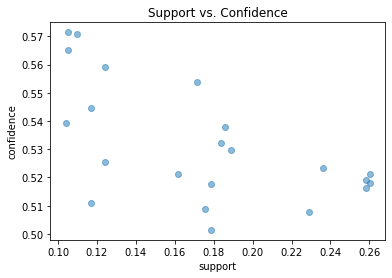

In [ ]:
%matplotlib inline
plt.scatter(rulesCB['support'], rulesCB['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs. Confidence')
plt.show()

2. Lift vs. Confidence

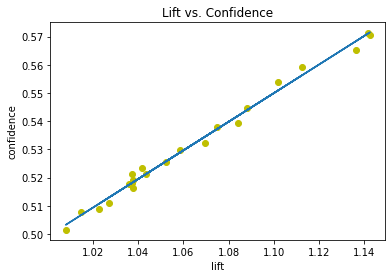

In [ ]:
fitCB = np.polyfit(rulesCB['lift'], rulesCB['confidence'], 1)
fitCB_fn = np.poly1d(fitCB)
plt.plot(rulesCB['lift'], rulesCB['confidence'], 'yo', rulesCB['lift'], fitCB_fn(rulesCB['lift']))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs. Confidence')
plt.show()

3. Support vs. Lift

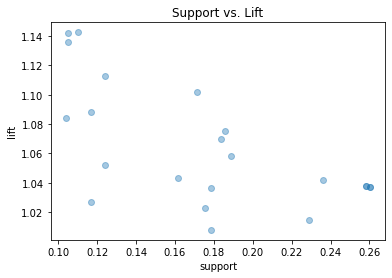

In [ ]:
plt.scatter(rulesCB['support'], rulesCB['lift'], alpha=0.4)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs. Lift')
plt.show()

**Clustering with K-Means algorithm**

In [ ]:
df_ConsumerBehavior_clean.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,normalizedQuantity,normalized_smooth_price_bin_mean
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,0.666667,1.000000
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,0.444444,0.000000
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,0.666667,0.492013
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,0.777778,0.492013
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,0.666667,1.000000


In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
X_CB = df_ConsumerBehavior_clean.drop(['Customer type', 'Gender', 'Product line', 'Day of Week', 'Time of Day', 'Payment'], axis=1)
X_CB_N = scaler.fit_transform(X_CB)

In [ ]:
X_CB.head()

,normalizedQuantity,normalized_smooth_price_bin_mean
0,0.666667,1.000000
1,0.444444,0.000000
2,0.666667,0.492013
3,0.777778,0.492013
4,0.666667,1.000000


In [ ]:
X_CB_N.shape

(991, 2)

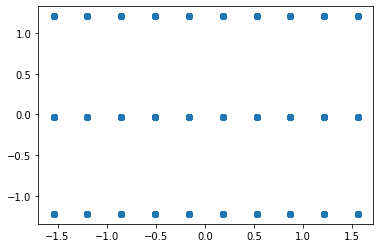

In [ ]:
plt.scatter(X_CB_N[:,0], X_CB_N[:,1])

In [ ]:
#using k means algorithm
from sklearn.cluster import KMeans
kmeansCB_3 = KMeans(n_clusters=3, random_state=1)
kmeansCB_3.fit(X_CB_N)
y_kmeansCB_3=kmeansCB_3.predict(X_CB_N)

In [ ]:
y_kmeansCB_3

array([1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2,

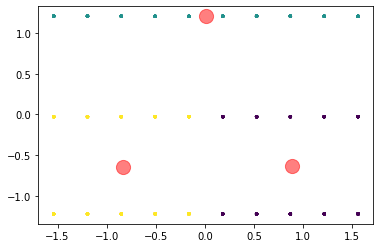

In [ ]:
plt.scatter(X_CB_N[:,0], X_CB_N[:,1], c=y_kmeansCB_3,s=5)
centers=kmeansCB_3.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=200, alpha=0.5)

Silhouette score indicates the distance between clusters. A number close to 1 indicates that it is far away from neighboring clusters.

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_CB_N, y_kmeansCB_3, metric='euclidean')

0.43478185804751796

The Calinski Harabasz score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. A higher number is better.

In [ ]:
metrics.calinski_harabasz_score(X_CB_N, y_kmeansCB_3)

825.9610887887504

In [ ]:
kmeansCB_3.inertia_ #sum of squared distance points vs. centers

741.770350896081

In [ ]:
kmeansCB_3.score(X_CB_N)

-741.770350896081

In [ ]:
kmeansCB_2=KMeans(n_clusters=2, random_state=1)
kmeansCB_2.fit(X_CB_N)
y_kmeansCB_2= kmeansCB_2.predict(X_CB_N)
metrics.silhouette_score(X_CB_N, y_kmeansCB_2, metric='euclidean')

0.3702298160426617

In [ ]:
metrics.calinski_harabasz_score(X_CB_N, y_kmeansCB_2)

602.3054620676181

In [ ]:
kmeansCB_2.inertia_

1231.8175527739832

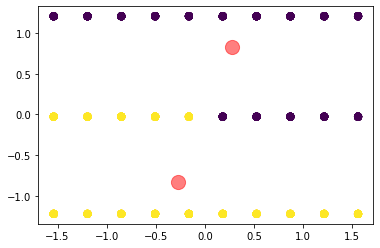

In [ ]:
plt.scatter(X_CB_N[:,0],X_CB_N[:,1], c=y_kmeansCB_2, s=50, cmap='viridis')
centers=kmeansCB_2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=200, alpha=0.5)

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc_3_CB = SpectralClustering(n_clusters=3, random_state=2)
y_sc_3_CB=sc_3_CB.fit_predict(X_CB)

In [ ]:
metrics.silhouette_score(X_CB_N, y_sc_3_CB, metric='euclidean')

0.43478185804751796

In [ ]:
from sklearn import datasets
noisy_circles=datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
noisy_circles

(array([[-0.40087671,  0.31739448],
        [-0.36439494, -0.93959645],
        [ 0.4686439 ,  0.02984099],
        ...,
        [ 0.96476264,  0.25730343],
        [-0.87945881,  0.41839808],
        [ 0.18809875, -0.43658476]]), array([1, 0, 1, ..., 0, 0, 1]))

In [ ]:
X_CB, y1=noisy_circles

#normalize dataset for easier parameter selction
X_CB=preprocessing.StandardScaler().fit_transform(X_CB)

In [ ]:
X_CB

array([[-0.71201528,  0.56777687],
       [-0.6470116 , -1.67916596],
       [ 0.83730726,  0.05375864],
       ...,
       [ 1.72129775,  0.46036069],
       [-1.56475876,  0.74832654],
       [ 0.33742846, -0.78000394]])

In [ ]:
y1

array([1, 0, 1, ..., 0, 0, 1])

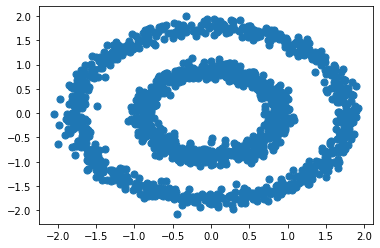

In [ ]:
plt.scatter(X_CB[:,0], X_CB[:,1], s=50, cmap='viridis')

In [ ]:
kmeansCB_2=KMeans(n_clusters=2, random_state=1)
kmeansCB_2.fit(X_CB)
y_kmeansCB_2=kmeansCB_2.predict(X_CB)

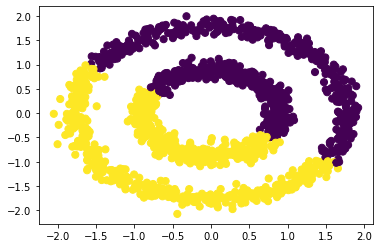

In [ ]:
plt.scatter(X_CB[:,0],X_CB[:,1], c= y_kmeansCB_2,s=50,cmap='viridis')

In [ ]:
spectral1 = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")

In [ ]:
y1_predict = spectral1.fit_predict(X_CB)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
metrics.silhouette_score(X_CB, y1_predict, metric='euclidean')

0.11342292598475925

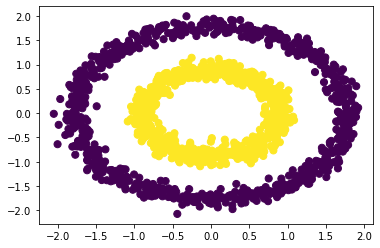

In [ ]:
plt.scatter(X_CB[:,0], X_CB[:,1], c=y1_predict, s=50, cmap='viridis')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=0.3)

In [ ]:
y1_p=dbscan1.fit_predict(X_CB)

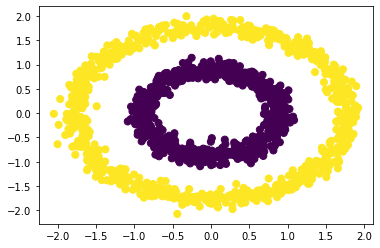

In [ ]:
plt.scatter(X_CB[:,0], X_CB[:,1], c=y1_p, s=50, cmap='viridis')

In [ ]:
metrics.silhouette_score(X_CB, y1_p, metric='euclidean')

0.11342292598475925

**Naive Bayesian Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Implementing to find which types of customers buy items with the highest prices. 

In [ ]:
#Make a function to change the numerical values to categorical
def getPrice(x):
  if(x < 0.4):
    return 'Low Price'
  if(x >= 0.4) and (x < 1):
    return 'Medium Price'
  if(x >= 0.5):
    return 'High Price'

In [ ]:
#Make a function to change the numerical values to categorical
def getQuantity(x):
  if(x < 0.444444):
    return 'Low Quantity'
  if(x >= 0.444444) and (x <= 0.777778):
    return 'Medium Quantity'
  if(x >= 0.777778):
    return 'High Quantity'

In [ ]:
df_ConsumerBehavior_clean['quantity_category'] = df_ConsumerBehavior_clean['normalizedQuantity'].apply(getQuantity)

In [ ]:
df_ConsumerBehavior_clean['price_category'] = df_ConsumerBehavior_clean['normalized_smooth_price_bin_mean'].apply(getPrice)

In [ ]:
df_ConsumerBehavior_clean.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,normalizedQuantity,normalized_smooth_price_bin_mean,quantity_category,price_category
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,0.666667,1.000000,Medium Quantity,High Price
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,0.444444,0.000000,Medium Quantity,Low Price
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,0.666667,0.492013,Medium Quantity,Medium Price
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,0.777778,0.492013,Medium Quantity,Medium Price
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,0.666667,1.000000,Medium Quantity,High Price


In [ ]:
df_ConsumerBehavior_cleanCat = df_ConsumerBehavior_clean.drop(['normalized_smooth_price_bin_mean', 'normalizedQuantity'], axis = 1)

In [ ]:
df_ConsumerBehavior_cleanCat.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,quantity_category,price_category
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,Medium Quantity,High Price
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,Medium Quantity,Low Price
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Quantity,Medium Price
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,Medium Quantity,Medium Price
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,Medium Quantity,High Price


In [ ]:
X = df_ConsumerBehavior_cleanCat.iloc[:,0:7]
X = pd.get_dummies(X)
Computer = {}
Computer['feature_names'] = X.columns.values
Computer['data']=X.values
Y = df_ConsumerBehavior_cleanCat.iloc[:,7:8]
Computer['target_names']=Y['price_category'].unique()
Computer['target']=Y['price_category'].values

In [ ]:
X.head()

,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Time of Day_Afternoon,Time of Day_Evening,Time of Day_Morning,Payment_Cash,Payment_Credit card,Payment_Ewallet,quantity_category_High Quantity,quantity_category_Low Quantity,quantity_category_Medium Quantity
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
Y.head()

,price_category
0,High Price
1,Low Price
2,Medium Price
3,Medium Price
4,High Price


In [ ]:
NB_B2 = BernoulliNB()
scores = cross_val_score(NB_B2, Computer['data'], Computer['target'], cv=5, scoring='accuracy')
scores

array([0.32663317, 0.28787879, 0.31313131, 0.34848485, 0.35858586])

In [ ]:
#see mean and confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.33 (+/- 0.05)


In [ ]:
NB_M2 = MultinomialNB()
scores = cross_val_score(NB_M2, Computer['data'], Computer['target'], cv= 5,scoring='accuracy')
scores

array([0.29145729, 0.31313131, 0.28787879, 0.32323232, 0.34343434])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.31 (+/- 0.04)


In [ ]:
#using Bernoulli because it is slightly more accurate
yPredict= NB_B2.fit(Computer['data'],Computer['target']).predict(Computer['data'])

In [ ]:
df_ConsumerBehavior_cleanCat['predict'] = yPredict
df_ConsumerBehavior_cleanCat.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,quantity_category,price_category,predict
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,Medium Quantity,High Price,Low Price
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,Medium Quantity,Low Price,High Price
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Quantity,Medium Price,Medium Price
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,Medium Quantity,Medium Price,Medium Price
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,Medium Quantity,High Price,Medium Price


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Computer['target'], yPredict)

array([[143,  89, 111],
       [117, 114, 101],
       [110,  81, 125]])

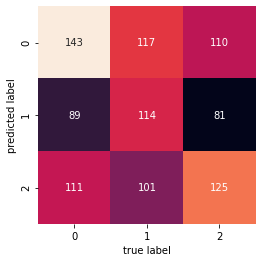

In [ ]:
mat = confusion_matrix(Computer['target'], yPredict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Neither the Bernoulli nor the multinomial method are very accurate for this dataset.

In [ ]:
#trying with only categorical data -- removing anything that was originally numerical
df_ConsumerBehavior_cleanCat2 = df_ConsumerBehavior_cleanCat.drop(['price_category', 'quantity_category', 'predict'], axis=1)
df_ConsumerBehavior_cleanCat2.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet
1,Normal,Female,Electronic accessories,Friday,Morning,Cash
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet


In [ ]:
X = df_ConsumerBehavior_cleanCat2.iloc[:,0:4]
X = pd.get_dummies(X)
Computer = {}
Computer['feature_names'] = X.columns.values
Computer['data']=X.values
Y = df_ConsumerBehavior_cleanCat.iloc[:,5:6]
Computer['target_names']=Y['Payment'].unique()
Computer['target']=Y['Payment'].values

In [ ]:
X.head()

,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
Y.head()

,Payment
0,Ewallet
1,Cash
2,Credit card
3,Ewallet
4,Ewallet


In [ ]:
NB_B = BernoulliNB()
scores = cross_val_score(NB_B, Computer['data'], Computer['target'], cv=5, scoring='accuracy')
scores

array([0.35175879, 0.33333333, 0.35858586, 0.28787879, 0.34848485])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.34 (+/- 0.05)


In [ ]:
NB_M = MultinomialNB()
scores = cross_val_score(NB_M, Computer['data'],Computer['target'], cv=5, scoring='accuracy')
scores

array([0.35175879, 0.33838384, 0.32828283, 0.29292929, 0.35858586])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.05)


In [ ]:
y_predict= NB_B.fit(Computer['data'],Computer['target']).predict(Computer['data'])

In [ ]:
df_ConsumerBehavior_cleanCat2['predict']= y_predict
df_ConsumerBehavior_cleanCat2.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,predict
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,Credit card
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,Cash
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,Ewallet
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,Credit card
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,Ewallet


Naive Bayesian Classification is not effective at predicting the results of this data set.

# **Modeling Store Sales**

Unsupervised Learning using:

*   Association Rule Mining
*   K-Means Clustering

Supervised Learning using: 

*   Naive Bayesian Classifier
*   Decision Tree

to find patterns in store sales.



In [ ]:
df_StoreSales.head() #examine data set we will be using

,Branch,Product line,Quantity,Day of Week,Time of Day,Payment,Rating,smooth_price_bin_mean,smooth_cogs_bin_mean
0,A,Health and beauty,7,Saturday,Afternoon,Ewallet,9.1,85.429034,575.0
1,C,Electronic accessories,5,Friday,Morning,Cash,9.6,25.011837,78.0
2,A,Home and lifestyle,7,Sunday,Afternoon,Credit card,7.4,54.737911,348.0
3,A,Health and beauty,8,Sunday,Evening,Ewallet,8.4,54.737911,445.0
4,A,Sports and travel,7,Friday,Morning,Ewallet,5.3,85.429034,575.0


In [ ]:
df_StoreSales['smooth_cogs_bin_mean'].min()

38.0

In [ ]:
df_StoreSales['smooth_price_bin_mean'].min()

25.011837349397595

In [ ]:
df_StoreSales['smooth_cogs_bin_mean'].max()

772.0

In [ ]:
df_StoreSales['smooth_price_bin_mean'].max()

85.42903409090907

**Normalization** - Using min/max normalization because there are distinct minimum and maximum values.

In [ ]:
print(df_StoreSales.shape)

(991, 9)


In [ ]:
df_StoreSales['normalized_price_bin_mean'] = normalize(df_StoreSales['smooth_price_bin_mean']) 
df_StoreSales['normalized_price_bin_mean'] #using same normalize fuction as above in consumer behavior

0      1.000000
1      0.000000
2      0.492013
3      0.492013
4      1.000000
         ...   
994    0.492013
995    0.492013
997    0.000000
998    0.492013
999    1.000000
Name: normalized_price_bin_mean, Length: 991, dtype: float64

In [ ]:
df_StoreSales['normalized_cogs_bin_mean'] = normalize(df_StoreSales['smooth_cogs_bin_mean'])
df_StoreSales['normalized_cogs_bin_mean']

0      0.731608
1      0.054496
2      0.422343
3      0.554496
4      0.731608
         ...   
994    0.000000
995    0.000000
997    0.000000
998    0.054496
999    0.731608
Name: normalized_cogs_bin_mean, Length: 991, dtype: float64

In [ ]:
df_StoreSales['normalizedQuantity'] = normalize(df_StoreSales['Quantity'])
df_StoreSales['normalizedQuantity']

0      0.666667
1      0.444444
2      0.666667
3      0.777778
4      0.666667
         ...   
994    0.000000
995    0.000000
997    0.000000
998    0.000000
999    0.666667
Name: normalizedQuantity, Length: 991, dtype: float64

In [ ]:
df_StoreSales['normalizedRating'] = normalize(df_StoreSales['Rating'])
df_StoreSales['normalizedRating']

0      0.850000
1      0.933333
2      0.566667
3      0.733333
4      0.216667
         ...   
994    0.316667
995    0.366667
997    0.616667
998    0.016667
999    0.433333
Name: normalizedRating, Length: 991, dtype: float64

In [ ]:
df_StoreSales_clean = df_StoreSales.drop(['Quantity', 'smooth_cogs_bin_mean', 'smooth_price_bin_mean', 'Rating'], axis=1)
df_StoreSales_clean.head()

,Branch,Product line,Day of Week,Time of Day,Payment,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,normalizedRating
0,A,Health and beauty,Saturday,Afternoon,Ewallet,1.000000,0.731608,0.666667,0.850000
1,C,Electronic accessories,Friday,Morning,Cash,0.000000,0.054496,0.444444,0.933333
2,A,Home and lifestyle,Sunday,Afternoon,Credit card,0.492013,0.422343,0.666667,0.566667
3,A,Health and beauty,Sunday,Evening,Ewallet,0.492013,0.554496,0.777778,0.733333
4,A,Sports and travel,Friday,Morning,Ewallet,1.000000,0.731608,0.666667,0.216667


**Association Rule Mining**

In [ ]:
df_StoreSales_clean.dtypes

Branch                        object
Product line                  object
Day of Week                   object
Time of Day                   object
Payment                       object
normalized_price_bin_mean    float64
normalized_cogs_bin_mean     float64
normalizedQuantity           float64
normalizedRating             float64
dtype: object

In [ ]:
#separating categorical data
obj_df_StoreSales = df_StoreSales_clean.select_dtypes(include=['object']).copy()
obj_df_StoreSales.head()

,Branch,Product line,Day of Week,Time of Day,Payment
0,A,Health and beauty,Saturday,Afternoon,Ewallet
1,C,Electronic accessories,Friday,Morning,Cash
2,A,Home and lifestyle,Sunday,Afternoon,Credit card
3,A,Health and beauty,Sunday,Evening,Ewallet
4,A,Sports and travel,Friday,Morning,Ewallet


In [ ]:
#making sure there are no null values
obj_df_StoreSales[obj_df_StoreSales.isnull().any(axis=1)]

,Branch,Product line,Day of Week,Time of Day,Payment


In [ ]:
#convert data frame to list of lists
lol2 = obj_df_StoreSales.values.tolist()

In [ ]:
oht2 = TransactionEncoder()
oht2_ary = oht2.fit_transform(lol2)
oht2_ary

array([[ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
oht2_ary=oht2_ary.astype("int")
newDF_StoreSales = pd.DataFrame(oht2_ary, columns=oht2.columns_)
newDF_StoreSales.head()

,A,Afternoon,B,C,Cash,Credit card,Electronic accessories,Evening,Ewallet,Fashion accessories,Food and beverages,Friday,Health and beauty,Home and lifestyle,Monday,Morning,Saturday,Sports and travel,Sunday,Thursday,Tuesday,Wednesday
0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
#finding frequent itemsets with given minimum support
freq_itemsetsSS = apriori(newDF_StoreSales, min_support=0.1, use_colnames=True)
freq_itemsetsSS

,support,itemsets
0,0.342079,(A)
1,0.451060,(Afternoon)
2,0.332997,(B)
3,0.324924,(C)
4,0.345106,(Cash)
5,0.309788,(Credit card)
6,0.171544,(Electronic accessories)
7,0.356206,(Evening)
8,0.345106,(Ewallet)
9,0.176589,(Fashion accessories)


In [ ]:
rulesSS = association_rules(freq_itemsetsSS, metric='confidence', min_threshold=0.3)
rulesSS

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Afternoon),(A),0.451060,0.342079,0.158426,0.351230,1.026753,0.004128,1.014106
1,(A),(Afternoon),0.342079,0.451060,0.158426,0.463127,1.026753,0.004128,1.022477
2,(Cash),(A),0.345106,0.342079,0.110999,0.321637,0.940244,-0.007054,0.969867
3,(A),(Cash),0.342079,0.345106,0.110999,0.324484,0.940244,-0.007054,0.969472
4,(Credit card),(A),0.309788,0.342079,0.103935,0.335505,0.980783,-0.002036,0.990107
5,(A),(Credit card),0.342079,0.309788,0.103935,0.303835,0.980783,-0.002036,0.991448
6,(Evening),(A),0.356206,0.342079,0.109990,0.308782,0.902663,-0.011861,0.951829
7,(A),(Evening),0.342079,0.356206,0.109990,0.321534,0.902663,-0.011861,0.948897
8,(Ewallet),(A),0.345106,0.342079,0.127144,0.368421,1.077007,0.009091,1.041709
9,(A),(Ewallet),0.342079,0.345106,0.127144,0.371681,1.077007,0.009091,1.042296


Positive correlation: 

In [ ]:
rulesSS[rulesSS.lift > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Afternoon),(A),0.451060,0.342079,0.158426,0.351230,1.026753,0.004128,1.014106
1,(A),(Afternoon),0.342079,0.451060,0.158426,0.463127,1.026753,0.004128,1.022477
8,(Ewallet),(A),0.345106,0.342079,0.127144,0.368421,1.077007,0.009091,1.041709
9,(A),(Ewallet),0.342079,0.345106,0.127144,0.371681,1.077007,0.009091,1.042296
12,(Afternoon),(C),0.451060,0.324924,0.150353,0.333333,1.025880,0.003793,1.012614
13,(C),(Afternoon),0.324924,0.451060,0.150353,0.462733,1.025880,0.003793,1.021727
17,(Afternoon),(Ewallet),0.451060,0.345106,0.167508,0.371365,1.076089,0.011844,1.041771
18,(Ewallet),(Afternoon),0.345106,0.451060,0.167508,0.485380,1.076089,0.011844,1.066691
21,(Credit card),(B),0.309788,0.332997,0.108981,0.351792,1.056441,0.005822,1.028995
22,(B),(Credit card),0.332997,0.309788,0.108981,0.327273,1.056441,0.005822,1.025991


Negative Correlation:

In [ ]:
rulesSS[rulesSS.lift < 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Cash),(A),0.345106,0.342079,0.110999,0.321637,0.940244,-0.007054,0.969867
3,(A),(Cash),0.342079,0.345106,0.110999,0.324484,0.940244,-0.007054,0.969472
4,(Credit card),(A),0.309788,0.342079,0.103935,0.335505,0.980783,-0.002036,0.990107
5,(A),(Credit card),0.342079,0.309788,0.103935,0.303835,0.980783,-0.002036,0.991448
6,(Evening),(A),0.356206,0.342079,0.109990,0.308782,0.902663,-0.011861,0.951829
7,(A),(Evening),0.342079,0.356206,0.109990,0.321534,0.902663,-0.011861,0.948897
10,(Afternoon),(B),0.451060,0.332997,0.142281,0.315436,0.947265,-0.007921,0.974348
11,(B),(Afternoon),0.332997,0.451060,0.142281,0.427273,0.947265,-0.007921,0.958467
14,(Afternoon),(Cash),0.451060,0.345106,0.153380,0.340045,0.985334,-0.002283,0.992331
15,(Cash),(Afternoon),0.345106,0.451060,0.153380,0.444444,0.985334,-0.002283,0.988093


In [ ]:
rulesSS[rulesSS.lift == 1] #Independent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
rulesSS[rulesSS['lift']>1.1] #these have more significant positive correlation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Evening),(B),0.356206,0.332997,0.131181,0.368272,1.105932,0.012565,1.055839
24,(B),(Evening),0.332997,0.356206,0.131181,0.393939,1.105932,0.012565,1.062260


**Visualize the results**

1. Support vs. Confidence

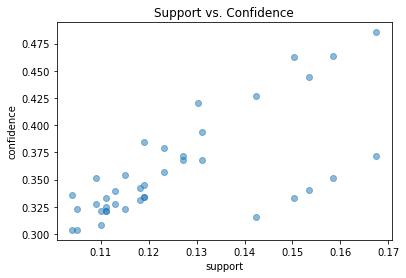

In [ ]:
%matplotlib inline

plt.scatter(rulesSS['support'], rulesSS['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs. Confidence')
plt.show()

2. Lift vs. Confidence

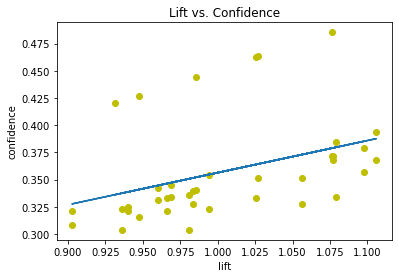

In [ ]:
fitSS = np.polyfit(rulesSS['lift'], rulesSS['confidence'], 1)
fitSS_fn = np.poly1d(fitSS)
plt.plot(rulesSS['lift'], rulesSS['confidence'], 'yo', rulesSS['lift'], fitSS_fn(rulesSS['lift']))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs. Confidence')
plt.show()

3. Support vs. Lift

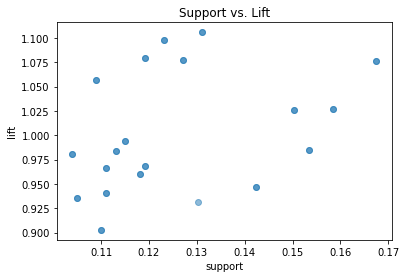

In [ ]:
plt.scatter(rulesSS['support'], rulesSS['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs. Lift')
plt.show()

**Clustering with K-Means Algorithm**

In [ ]:
df_StoreSales_clean.head()

,Branch,Product line,Day of Week,Time of Day,Payment,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,normalizedRating
0,A,Health and beauty,Saturday,Afternoon,Ewallet,1.000000,0.731608,0.666667,0.850000
1,C,Electronic accessories,Friday,Morning,Cash,0.000000,0.054496,0.444444,0.933333
2,A,Home and lifestyle,Sunday,Afternoon,Credit card,0.492013,0.422343,0.666667,0.566667
3,A,Health and beauty,Sunday,Evening,Ewallet,0.492013,0.554496,0.777778,0.733333
4,A,Sports and travel,Friday,Morning,Ewallet,1.000000,0.731608,0.666667,0.216667


In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
X_SS = df_StoreSales_clean.drop(['Branch', 'Product line','Day of Week', 'Time of Day', 'Payment'], axis=1)
X_SS_N = scaler.fit_transform(X_SS)

In [ ]:
X_SS.head() #the features that will be used for the kmeans algorithm

,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,normalizedRating
0,1.000000,0.731608,0.666667,0.850000
1,0.000000,0.054496,0.444444,0.933333
2,0.492013,0.422343,0.666667,0.566667
3,0.492013,0.554496,0.777778,0.733333
4,1.000000,0.731608,0.666667,0.216667


In [ ]:
X_SS_N.shape

(991, 4)

In [ ]:
#using k means algorithm - creating 3 clusters
kmeansSS_3 = KMeans(n_clusters=3, random_state=1)
kmeansSS_3.fit(X_SS_N)
y_kmeansSS_3=kmeansSS_3.predict(X_SS_N)

In [ ]:
y_kmeansSS_3 #the list of all the clusters each point is in

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1,
       1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1,
       2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0,

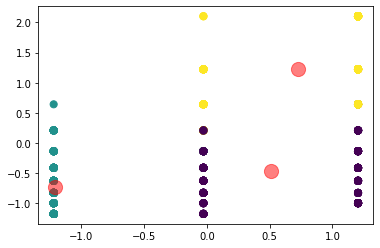

In [ ]:
plt.scatter(X_SS_N[:,0], X_SS_N[:,1], c=y_kmeansSS_3, s=50, cmap='viridis')
centers=kmeansSS_3.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=200, alpha=0.5)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_SS_N, y_kmeansSS_3, metric='euclidean')

0.2938250918258634

In [ ]:
metrics.calinski_harabaz_score(X_SS_N, y_kmeansSS_3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


477.05477824344877

In [ ]:
kmeansSS_3.inertia_ #sum of squared distance of points vs. centers

2016.5865447284407

In [ ]:
kmeansSS_3.score(X_SS_N)

-2016.5865447284405

In [ ]:
kmeansSS_2 = KMeans(n_clusters=2, random_state=1)
kmeansSS_2.fit(X_SS_N)
y_kmeansSS_2 = kmeansSS_2.predict(X_SS_N)
metrics.silhouette_score(X_SS_N, y_kmeansSS_2, metric='euclidean')

0.31230404904974784

In [ ]:
metrics.calinski_harabaz_score(X_SS_N, y_kmeansSS_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


511.0019575335784

In [ ]:
kmeansSS_2.inertia_

2613.5939225347556

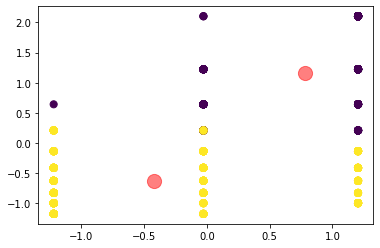

In [ ]:
plt.scatter(X_SS_N[:,0], X_SS_N[:,1],c=y_kmeansSS_2, s=50, cmap='viridis')
centers=kmeansSS_2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc_3_SS = SpectralClustering(n_clusters=3, random_state=2)
y_sc_3_SS = sc_3_SS.fit_predict(X_SS_N)

In [ ]:
metrics.silhouette_score(X_SS_N, y_sc_3_SS, metric='euclidean')

0.26522395239131435

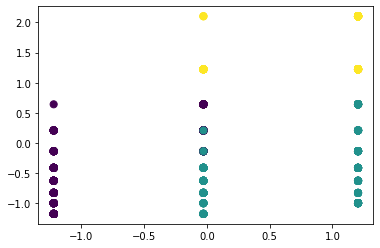

In [ ]:
plt.scatter(X_SS_N[:,0], X_SS_N[:,1], c=y_sc_3_SS, s=50, cmap='viridis')

In [ ]:
sc_2_SS = SpectralClustering(n_clusters=2, random_state=2)
y_sc_2_SS = sc_2_SS.fit_predict(X_SS_N)

In [ ]:
metrics.silhouette_score(X_SS_N, y_sc_2_SS, metric='euclidean')

0.3144303663956032

In [ ]:
from sklearn import datasets
noisy_circles2 = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
noisy_circles

(array([[-0.40087671,  0.31739448],
        [-0.36439494, -0.93959645],
        [ 0.4686439 ,  0.02984099],
        ...,
        [ 0.96476264,  0.25730343],
        [-0.87945881,  0.41839808],
        [ 0.18809875, -0.43658476]]), array([1, 0, 1, ..., 0, 0, 1]))

In [ ]:
X_SS, y2 = noisy_circles2

#normailize dataset for easier parameter selction
X_SS = preprocessing.StandardScaler().fit_transform(X_SS)

In [ ]:
X_SS

array([[ 1.71517815, -0.34408658],
       [ 0.4267056 ,  0.76057579],
       [ 0.05629254,  1.05209137],
       ...,
       [ 0.40743283, -1.61226523],
       [-0.40230407, -0.81392638],
       [-1.59370854, -1.00199446]])

In [ ]:
y2

array([0, 1, 1, ..., 0, 1, 0])

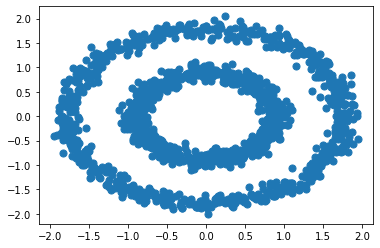

In [ ]:
plt.scatter(X_SS[:,0], X_SS[:,1], s=50, cmap='viradis')

In [ ]:
kmeansSS_2 = KMeans(n_clusters=2, random_state=1)
kmeansSS_2.fit(X_SS)
y_kmeansSS_2 = kmeansSS_2.predict(X_SS)

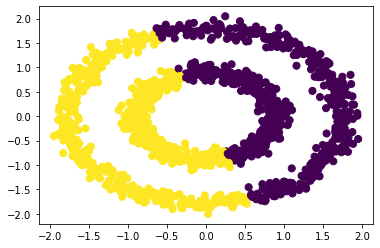

In [ ]:
plt.scatter(X_SS[:,0], X_SS[:,1], c= y_kmeansSS_2, s=50, cmap='viridis')

In [ ]:
spectral2 = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")

In [ ]:
y2_predict = spectral2.fit_predict(X_SS)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
metrics.silhouette_score(X_SS, y2_predict, metric='euclidean')

0.11385233717121679

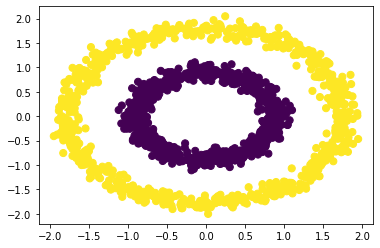

In [ ]:
plt.scatter(X_SS[:,0], X_SS[:,1], c=y2_predict, s=50, cmap='viridis')

In [ ]:
from sklearn.cluster import DBSCAN

dbscan2 = DBSCAN(eps=0.3)

In [ ]:
y2_p = dbscan2.fit_predict(X_SS)

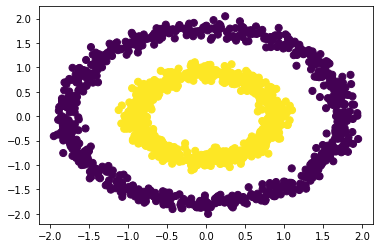

In [ ]:
plt.scatter(X_SS[:,0], X_SS[:,1], c=y2_p, s=50, cmap='viridis')

In [ ]:
metrics.silhouette_score(X_SS, y2_p, metric='euclidean')

0.11385233717121679

**Naive Bayes Classifier**
Predict the customer rating

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
df_StoreSales_clean.head() #our data is categorical and numerical values

,Branch,Product line,Day of Week,Time of Day,Payment,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,normalizedRating
0,A,Health and beauty,Saturday,Afternoon,Ewallet,1.000000,0.731608,0.666667,0.850000
1,C,Electronic accessories,Friday,Morning,Cash,0.000000,0.054496,0.444444,0.933333
2,A,Home and lifestyle,Sunday,Afternoon,Credit card,0.492013,0.422343,0.666667,0.566667
3,A,Health and beauty,Sunday,Evening,Ewallet,0.492013,0.554496,0.777778,0.733333
4,A,Sports and travel,Friday,Morning,Ewallet,1.000000,0.731608,0.666667,0.216667


In [ ]:
df_StoreSales_clean['normalized_price_bin_mean'].describe()

count    991.000000
mean       0.503003
std        0.412875
min        0.000000
25%        0.000000
50%        0.492013
75%        1.000000
max        1.000000
Name: normalized_price_bin_mean, dtype: float64

In [ ]:
#Make a function to change the numerical values to categorical
def getPrice(x):
  if(x < 0.4):
    return 'Low Price'
  if(x >= 0.4) and (x < 1):
    return 'Medium Price'
  if(x >= 0.5):
    return 'High Price'

In [ ]:
df_StoreSales_clean['price_category'] = df_StoreSales_clean['normalized_price_bin_mean'].apply(getPrice)


In [ ]:
df_StoreSales_clean['normalized_cogs_bin_mean'].describe()

count    991.000000
mean       0.358357
std        0.305447
min        0.000000
25%        0.106267
50%        0.232970
75%        0.554496
max        1.000000
Name: normalized_cogs_bin_mean, dtype: float64

In [ ]:
#Make a function to change the numerical values to categorical
def getCogs(x):
  if(x < 0.2):
    return 'Low COGS'
  if(x >= 0.232970) and (x < 0.554496):
    return 'Medium COGS'
  if(x >= 0.554496):
    return 'High COGS'

In [ ]:
df_StoreSales_clean['cogs_category'] = df_StoreSales_clean['normalized_cogs_bin_mean'].apply(getCogs)


In [ ]:
df_StoreSales_clean['normalizedQuantity'].describe()

count    991.000000
mean       0.496580
std        0.322781
min        0.000000
25%        0.222222
50%        0.444444
75%        0.777778
max        1.000000
Name: normalizedQuantity, dtype: float64

In [ ]:
#Make a function to change the numerical values to categorical
def getQuantity(x):
  if(x < 0.444444):
    return 'Low Quantity'
  if(x >= 0.444444) and (x <= 0.777778):
    return 'Medium Quantity'
  if(x >= 0.777778):
    return 'High Quantity'

In [ ]:
df_StoreSales_clean['Quantity_category'] = df_StoreSales_clean['normalizedQuantity'].apply(getQuantity)


In [ ]:
df_StoreSales_clean['normalizedRating'].describe()

count    991.00000
mean       0.49662
std        0.28616
min        0.00000
25%        0.25000
50%        0.50000
75%        0.75000
max        1.00000
Name: normalizedRating, dtype: float64

In [ ]:
#Make a function to change the numerical values to categorical
def getRating(x):
  if(x < 0.25):
    return 'Low Rating'
  if(x >= 0.25) and (x < 0.50):
    return 'Medium Rating'
  if(x >= 0.50):
    return 'High Rating'

In [ ]:
df_StoreSales_clean['Rating_category'] = df_StoreSales_clean['normalizedRating'].apply(getRating)


In [ ]:
df_StoreSales_categorized = df_StoreSales_clean.drop(['normalized_price_bin_mean', 'normalized_cogs_bin_mean', 'normalizedQuantity', 'normalizedRating'], axis=1)
df_StoreSales_categorized.head()

,Branch,Product line,Day of Week,Time of Day,Payment,price_category,cogs_category,Quantity_category,Rating_category
0,A,Health and beauty,Saturday,Afternoon,Ewallet,High Price,High COGS,Medium Quantity,High Rating
1,C,Electronic accessories,Friday,Morning,Cash,Low Price,Low COGS,Medium Quantity,High Rating
2,A,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Price,Medium COGS,Medium Quantity,High Rating
3,A,Health and beauty,Sunday,Evening,Ewallet,Medium Price,Medium COGS,Medium Quantity,High Rating
4,A,Sports and travel,Friday,Morning,Ewallet,High Price,High COGS,Medium Quantity,Low Rating


In [ ]:
X = df_StoreSales_categorized.iloc[:,1:8]
X = pd.get_dummies(X)
Computer = {}
Computer['feature_names'] = X.columns.values
Computer['data']=X.values
Y = df_StoreSales_categorized.iloc[:,8:9]
Computer['target_names']=Y['Rating_category'].unique()
Computer['target']=Y['Rating_category'].values

In [ ]:
X.head()

,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Time of Day_Afternoon,Time of Day_Evening,Time of Day_Morning,Payment_Cash,Payment_Credit card,Payment_Ewallet,price_category_High Price,price_category_Low Price,price_category_Medium Price,cogs_category_High COGS,cogs_category_Low COGS,cogs_category_Medium COGS,Quantity_category_High Quantity,Quantity_category_Low Quantity,Quantity_category_Medium Quantity
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1


In [ ]:
Y.head()

,Rating_category
0,High Rating
1,High Rating
2,High Rating
3,High Rating
4,Low Rating


In [ ]:
NB_B = BernoulliNB()

In [ ]:
scores = cross_val_score(NB_B, Computer['data'], Computer['target'], cv=5, scoring='accuracy')
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.45 (+/- 0.04)


In [ ]:
NB_M = MultinomialNB()
scores = cross_val_score(NB_M, Computer['data'],Computer['target'], cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.49 (+/- 0.03)


Use the Multinomial NB classifier because the accuracy was higher

In [ ]:
y_predict= NB_M.fit(Computer['data'],Computer['target']).predict(Computer['data'])

In [ ]:
df_StoreSales_categorized['predict'] = y_predict
df_StoreSales_categorized.head()

,Branch,Product line,Day of Week,Time of Day,Payment,price_category,cogs_category,Quantity_category,Rating_category,predict
0,A,Health and beauty,Saturday,Afternoon,Ewallet,High Price,High COGS,Medium Quantity,High Rating,High Rating
1,C,Electronic accessories,Friday,Morning,Cash,Low Price,Low COGS,Medium Quantity,High Rating,High Rating
2,A,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Price,Medium COGS,Medium Quantity,High Rating,High Rating
3,A,Health and beauty,Sunday,Evening,Ewallet,Medium Price,Medium COGS,Medium Quantity,High Rating,High Rating
4,A,Sports and travel,Friday,Morning,Ewallet,High Price,High COGS,Medium Quantity,Low Rating,High Rating


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Computer['target'], y_predict)

array([[480,   1,  17],
       [224,   0,   6],
       [239,   2,  22]])

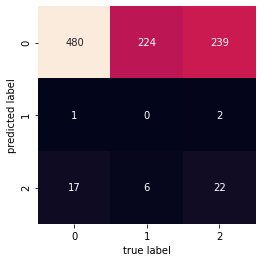

In [ ]:
mat = confusion_matrix(Computer['target'], y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
df_StoreSales_new = df_StoreSales_clean.drop(['cogs_category', 'price_category', 'Quantity_category', 'normalizedRating', 'Branch', 'Product line', 'Day of Week', 'Time of Day', 'Payment'], axis=1)
#keep only the rating(what we are predicting) as a category
#removing categorical values -- cannot be computed by decision tree

In [ ]:
df_StoreSales_new.head()


,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,Rating_category
0,1.000000,0.731608,0.666667,High Rating
1,0.000000,0.054496,0.444444,High Rating
2,0.492013,0.422343,0.666667,High Rating
3,0.492013,0.554496,0.777778,High Rating
4,1.000000,0.731608,0.666667,Low Rating


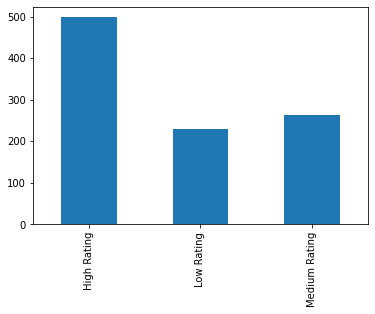

In [ ]:
#examining dataset in context of rating categories
%matplotlib inline
df_StoreSales_new['Rating_category'].value_counts().sort_index().plot.bar()

In [ ]:
#splitting the dataset into training and test datasets
#omitting random state to have different random split each
ySSR = df_StoreSales_new['Rating_category']
xSSR = df_StoreSales_new.drop('Rating_category', axis=1)
#splitting
X1_train, X1_test, Y1_train, Y1_test = train_test_split(xSSR, ySSR, test_size = 0.25)

In [ ]:
X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


((743, 3), (248, 3), (743,), (248,))

Building a Decision Tree

In [ ]:
#training the model with training dataset
tree_entropy1 = DecisionTreeClassifier(criterion='entropy')
tree_entropy1.fit(X1_train, Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Displaying Tree as Plot

<Figure size 1800x2160 with 0 Axes>

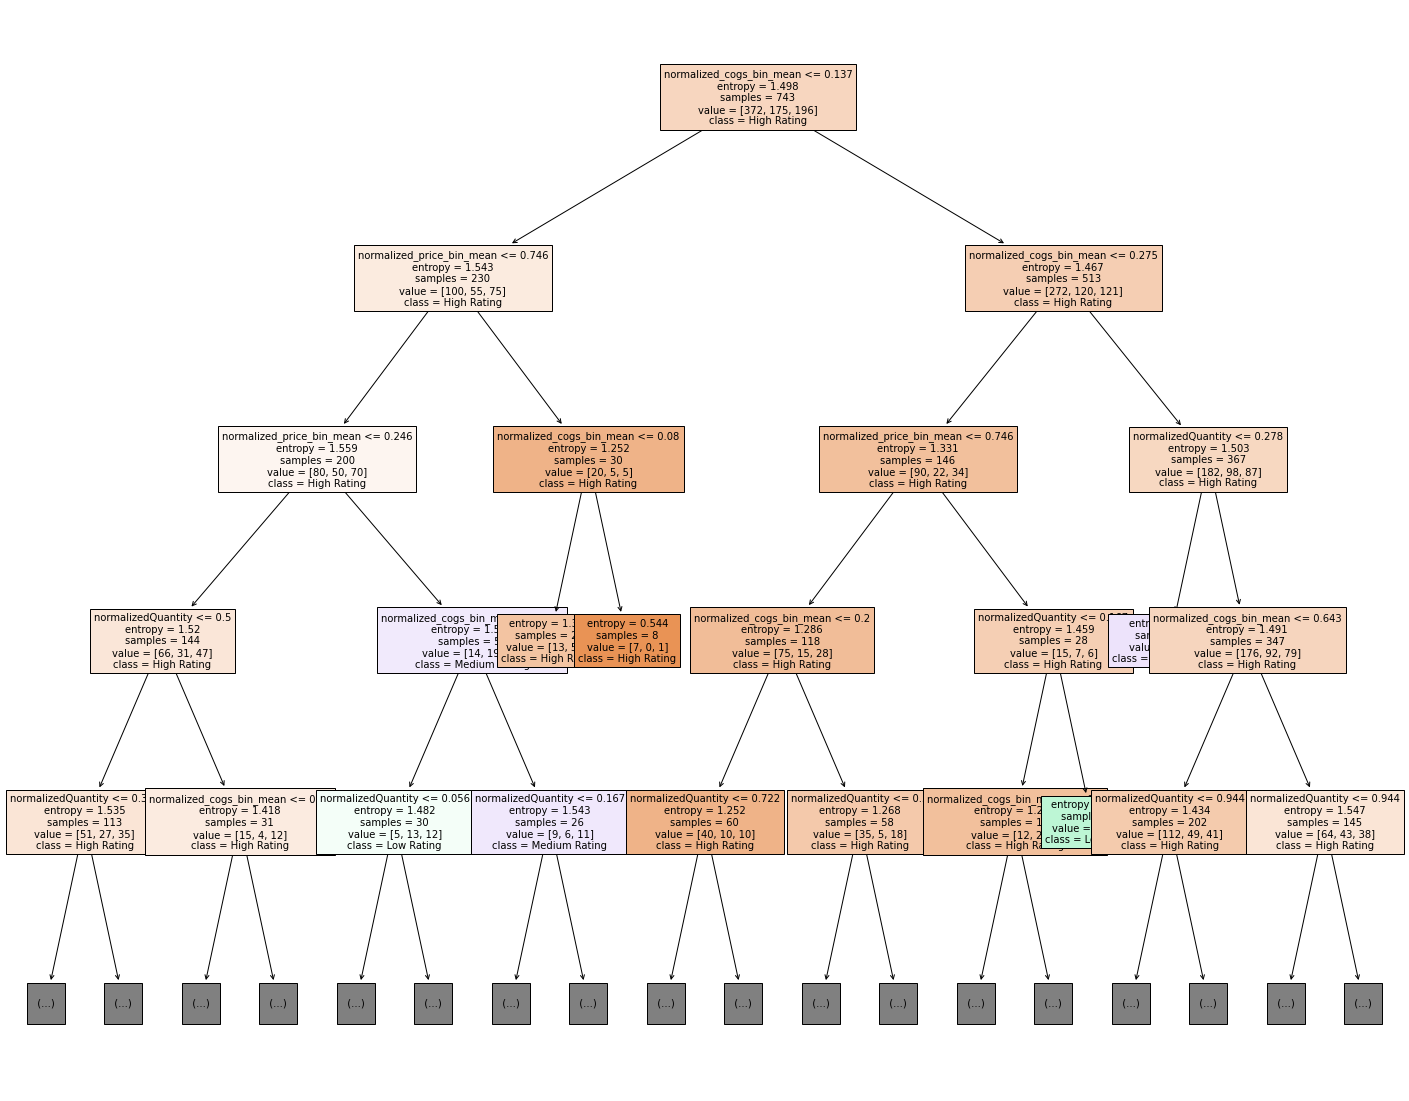

In [ ]:
fig = plt.figure(figsize=(25,30))
fn = ['normalized_price_bin_mean', 'normalized_cogs_bin_mean', 'normalizedQuantity']
cn = ['High Rating', 'Low Rating', 'Medium Rating']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25,20))
chart = tree.plot_tree(tree_entropy1, feature_names = fn, class_names=cn, filled=True, max_depth=4, fontsize=10)
plt.show()

Displaying Tree as text

In [ ]:
text_representation1 = tree.export_text(tree_entropy1)
print(text_representation1)

|--- feature_1 <= 0.14
|   |--- feature_0 <= 0.75
|   |   |--- feature_0 <= 0.25
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_2 <= 0.39
|   |   |   |   |   |--- feature_2 <= 0.28
|   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.17
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: High Rating
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.06
|   |   |   |   |   |   |   |   |   |   |--- class: High Rating
|   |   |   |   |   |   |   |   |--- feature_2 >  0.17
|   |   |   |   |   |   |   |   |   |--- class: High Rating
|   |   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.17
|   |   |   |   |   |   |   |   |   |--- class: High Rating
|   |   |   |   |   |   |   |   |--- feature_2 >  0.17
|   |   |   |   |   |   |   |   |   |--- class: High Rating
|   |  

Displaying the tree with graphviz

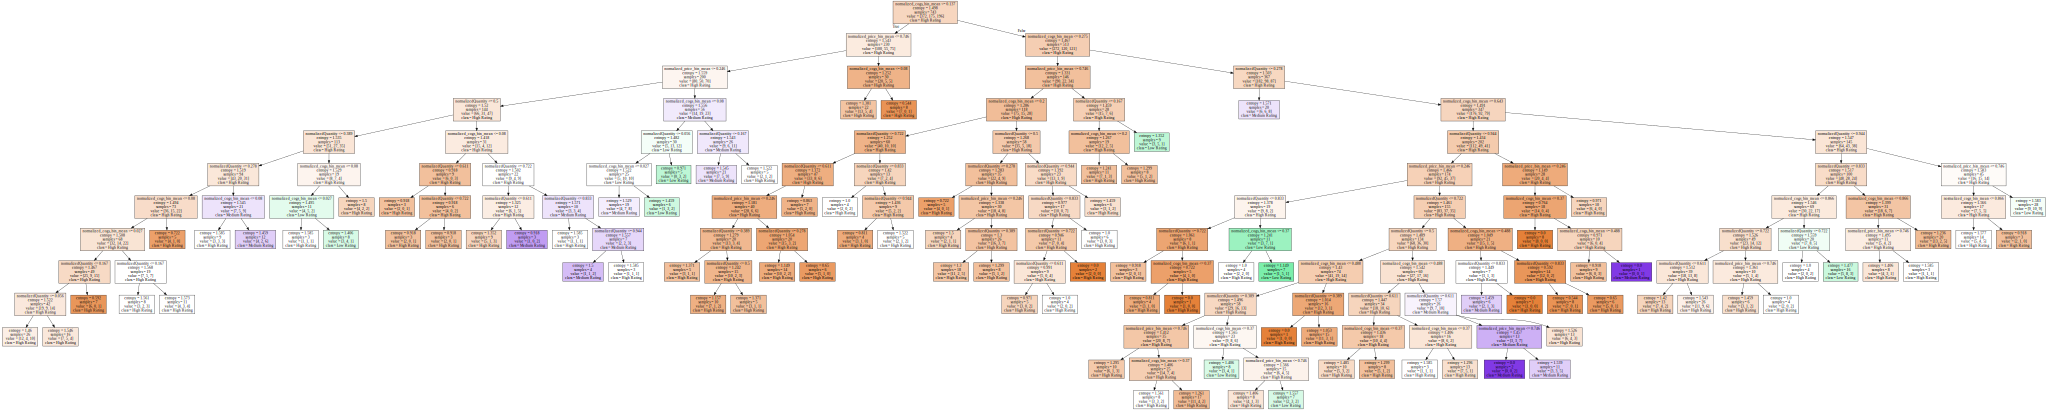

In [ ]:
import graphviz
#DOT data
dot_data1 = tree.export_graphviz(tree_entropy1, out_file=None, feature_names = fn, class_names=cn, filled=True)
#draw graph
graph1 = graphviz.Source(dot_data1, format="png")
graph1

In [ ]:
tree_entropy1.classes_

array(['High Rating', 'Low Rating', 'Medium Rating'], dtype=object)

In [ ]:
tree_entropy1.feature_importances_ #finding which feature is most important

array([0.20334618, 0.37172021, 0.4249336 ])

In [ ]:
#evaluating tree performance with test dataset -mean accuracy
original_tree_score = tree_entropy1.score(X1_test, Y1_test)
original_tree_score

0.43951612903225806

In [ ]:
#next round of decision tree building
tree_entropy1_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
tree_entropy1_3.fit(X1_train, Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dot_data1= tree.export_graphviz(tree_entropy1_3, out_file=None, feature_names=fn, class_names=cn, filled=True, rounded=True, special_characters=True)

In [ ]:
graph2 = graphviz.Source(dot_data1)
graph2.render('Store_Sales_entropy3')

'Store_Sales_entropy3.pdf'

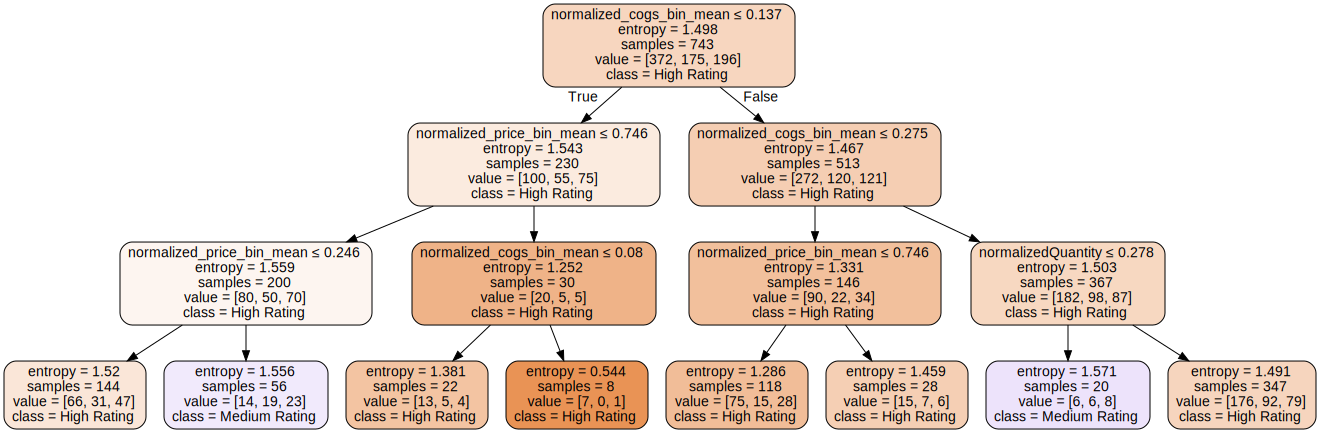

In [ ]:
graph2

In [ ]:
#evaluate tree performance
depth3_tree_score1 = tree_entropy1_3.score(X1_test, Y1_test)
depth3_tree_score1

0.4879032258064516

In [ ]:
#trying a different setting for the tree
tree_entropy1_4 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, criterion='entropy')
tree_entropy1_4.fit(X1_train, Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

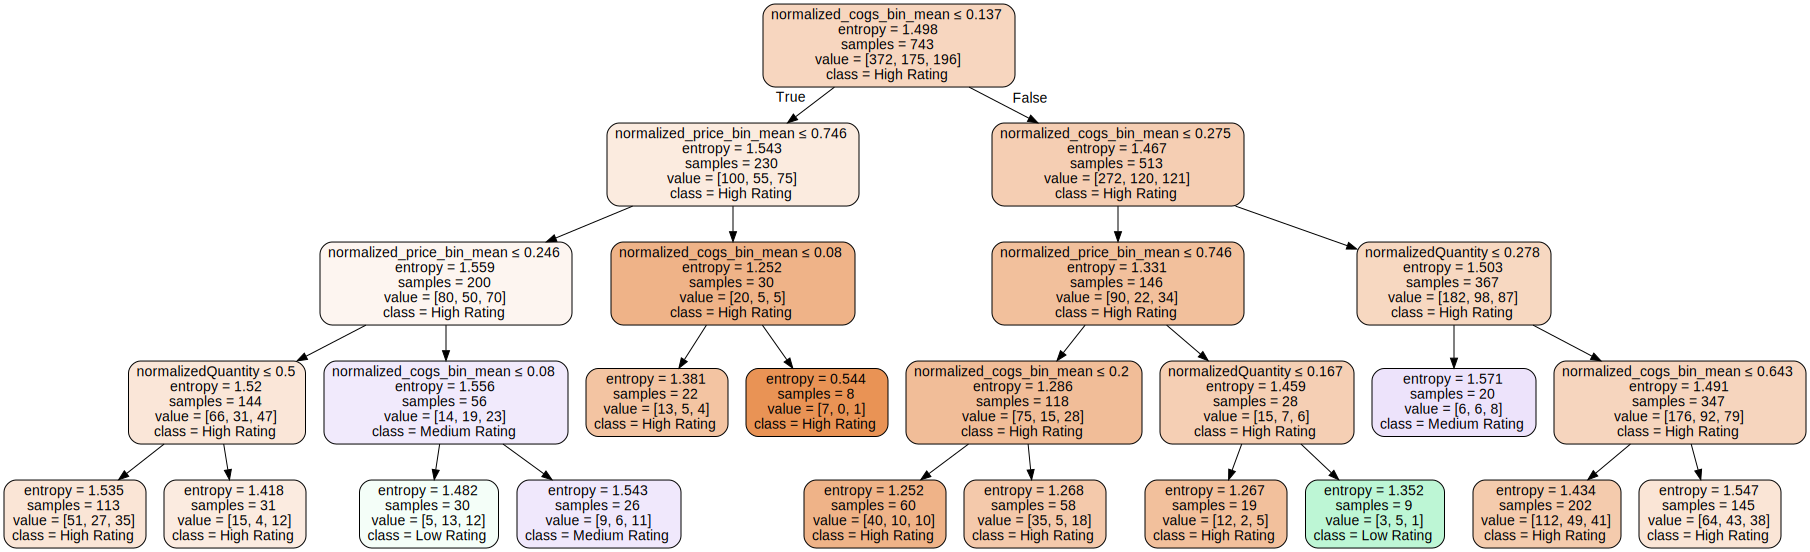

In [ ]:
dot_data1 = tree.export_graphviz(tree_entropy1_4, out_file=None, feature_names=fn, class_names=cn, filled=True, rounded=True, special_characters=True)
graph3 = graphviz.Source(dot_data1)
graph3.render('Store_Sales_entropy_4')
graph3

In [ ]:
#evaluate performance
depth4_tree_score1 = tree_entropy1_4.score(X1_test, Y1_test)
depth4_tree_score1

0.4717741935483871

In [ ]:
print(f"original tree score = {original_tree_score} with depth as {tree_entropy1.tree_.max_depth}\n\
depth three tree score = {depth3_tree_score1}\n\
depth four tree score = {depth4_tree_score1}")

original tree score = 0.43951612903225806 with depth as 12
depth three tree score = 0.4879032258064516
depth four tree score = 0.4717741935483871


The third tree has the best score so we will use it to predict

In [ ]:
#using the trained model to predict new data's class label
#continuing to used the test data set
y1_predict = tree_entropy1_4.predict(X1_test)
y1_predict_p = tree_entropy1_4.predict_proba(X1_test)
test_tree_df = pd.DataFrame(X1_test, columns=fn)
test_tree_df['class'] = Y1_test
test_tree_df['pre'] = y1_predict
test_tree_df['error'] = np.where(test_tree_df['class']!=test_tree_df['pre'],1,0)
p1 = pd.DataFrame(y1_predict_p, index = test_tree_df.index, columns= tree_entropy1_4.classes_)
test_tree_df= test_tree_df.join(p1)

#create a column showing the probability value of the prediction
for i in test_tree_df.index:
  c = test_tree_df.loc[i,'pre']
  test_tree_df.loc[i,'p_score']= test_tree_df.loc[i,c]

test_tree_df.head(10)

,normalized_price_bin_mean,normalized_cogs_bin_mean,normalizedQuantity,class,pre,error,High Rating,Low Rating,Medium Rating,p_score
215,0.000000,0.000000,0.000000,High Rating,High Rating,0,0.451327,0.238938,0.309735,0.451327
308,0.000000,0.054496,0.222222,Low Rating,High Rating,1,0.451327,0.238938,0.309735,0.451327
525,1.000000,0.554496,0.444444,High Rating,High Rating,0,0.554455,0.242574,0.202970,0.554455
321,0.000000,0.000000,0.000000,High Rating,High Rating,0,0.451327,0.238938,0.309735,0.451327
351,0.492013,0.422343,0.666667,Medium Rating,High Rating,1,0.554455,0.242574,0.202970,0.554455
242,1.000000,0.232970,0.111111,Medium Rating,High Rating,1,0.631579,0.105263,0.263158,0.631579
304,0.000000,0.106267,0.777778,High Rating,High Rating,0,0.483871,0.129032,0.387097,0.483871
3,0.492013,0.554496,0.777778,High Rating,High Rating,0,0.554455,0.242574,0.202970,0.554455
170,1.000000,0.422343,0.444444,Medium Rating,High Rating,1,0.554455,0.242574,0.202970,0.554455
121,0.492013,0.554496,0.666667,Medium Rating,High Rating,1,0.554455,0.242574,0.202970,0.554455


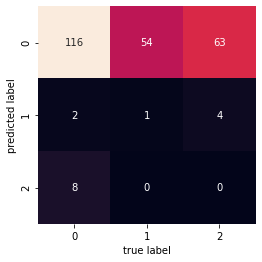

In [ ]:
mat = confusion_matrix(Y1_test, y1_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, y1_predict, labels=['High Rating', 'Low Rating', 'Medium Rating'])

array([[[  5, 117],
        [ 10, 116]],

       [[187,   6],
        [ 54,   1]],

       [[173,   8],
        [ 67,   0]]])

Conclusion: There is not enough correleation between rating and the numerical data to create an effective decision tree to predict rating.

# **Ensemble Method**

Using the bagging classifier (bootstrapping aggregation) to find relationships among categorical data relating to consumer behavior.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

In [ ]:
df_ConsumerBehavior_cleanCat.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,quantity_category,price_category,predict
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,Medium Quantity,High Price,Low Price
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,Medium Quantity,Low Price,High Price
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Quantity,Medium Price,Medium Price
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,Medium Quantity,Medium Price,Medium Price
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,Medium Quantity,High Price,Medium Price


In [ ]:
df_ConsumerBehavior_cleanCat2 = df_ConsumerBehavior_cleanCat.drop(['predict'], axis=1)
df_ConsumerBehavior_cleanCat2.head()

,Customer type,Gender,Product line,Day of Week,Time of Day,Payment,quantity_category,price_category
0,Member,Female,Health and beauty,Saturday,Afternoon,Ewallet,Medium Quantity,High Price
1,Normal,Female,Electronic accessories,Friday,Morning,Cash,Medium Quantity,Low Price
2,Normal,Male,Home and lifestyle,Sunday,Afternoon,Credit card,Medium Quantity,Medium Price
3,Member,Male,Health and beauty,Sunday,Evening,Ewallet,Medium Quantity,Medium Price
4,Normal,Male,Sports and travel,Friday,Morning,Ewallet,Medium Quantity,High Price


In [ ]:
#convert data frame to list of lists
lol = df_ConsumerBehavior_cleanCat.values.tolist()

In [ ]:
#use one hot encoding on all columns
oht = TransactionEncoder()
oht_ary = oht.fit_transform(lol)
oht_ary

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
oht_ary = oht_ary.astype("int")
new_df_ConsumerBehavior_cleanCat = pd.DataFrame(oht_ary, columns=oht.columns_)
new_df_ConsumerBehavior_cleanCat.head()

,Afternoon,Cash,Credit card,Electronic accessories,Evening,Ewallet,Fashion accessories,Female,Food and beverages,Friday,Health and beauty,High Price,High Quantity,Home and lifestyle,Low Price,Low Quantity,Male,Medium Price,Medium Quantity,Member,Monday,Morning,Normal,Saturday,Sports and travel,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0


In [ ]:
#creating train and test sets
new_df_ConsumerBehavior_cleanCat2 = new_df_ConsumerBehavior_cleanCat.drop(['High Price'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(new_df_ConsumerBehavior_cleanCat2, new_df_ConsumerBehavior_cleanCat['High Price'], random_state=0)

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=20, bootstrap=True)
bag_model=bag_model.fit(Xtrain,ytrain)

In [ ]:
ytest_pred=bag_model.predict(Xtest)
print(bag_model.score(Xtest, ytest))

0.7741935483870968


In [ ]:
print(confusion_matrix(ytest, ytest_pred))

[[ 82  28]
 [ 28 110]]


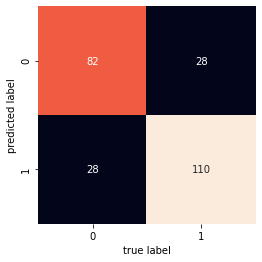

In [ ]:
mat = confusion_matrix(ytest, ytest_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
estimators = list(range(1, 50))
accuracy = []

for n_estimators in estimators:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                            max_samples=0.2,
                            n_estimators=n_estimators)
    clf.fit(new_df_ConsumerBehavior_cleanCat2, new_df_ConsumerBehavior_cleanCat['High Price'])
    ytest_pred=bag_model.predict(Xtest)
    acc = clf.score(Xtest, ytest)
    accuracy.append(acc)

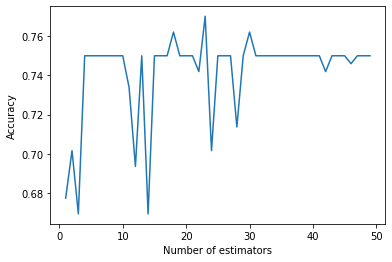

In [ ]:
plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()